# Lista prática I

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynp

## Vizinhos mais próximos

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

In [175]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

In [176]:
# Function to plot the images of misclassified numbers 
def plot_misclassified_images(features_test, labels_test, predictions, k):
    misclassified_indices = np.where(labels_test != predictions)[0]
    
    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(misclassified_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features_test[idx].reshape(8, 8), cmap='gray')
        plt.title(f'True: {labels_test[idx]}\nPred: {predictions[idx]}')
        plt.axis('off')
    plt.suptitle(f'Misclassified numbers (k={k})')
    plt.show()

For k = 1, we had an accuracy of 0.9822222222222222. 
And these were the misclassified images


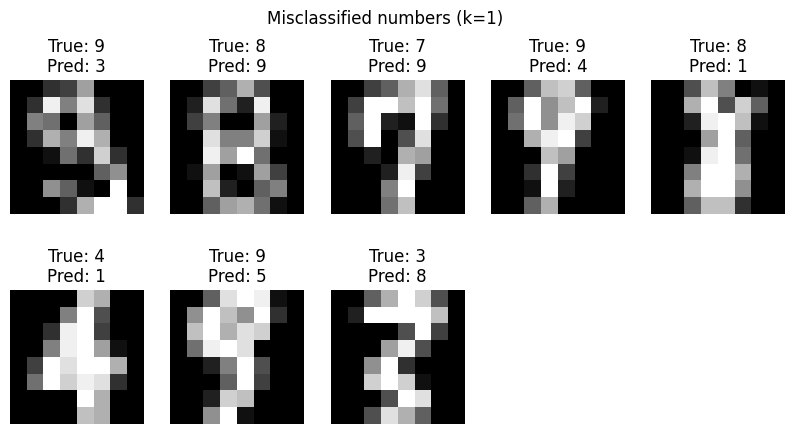

For k = 2, we had an accuracy of 0.9844444444444445. 
And these were the misclassified images


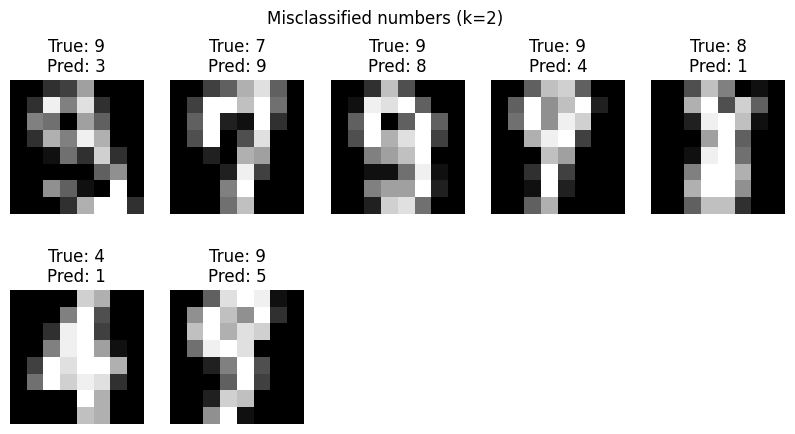

For k = 3, we had an accuracy of 0.9866666666666667. 
And these were the misclassified images


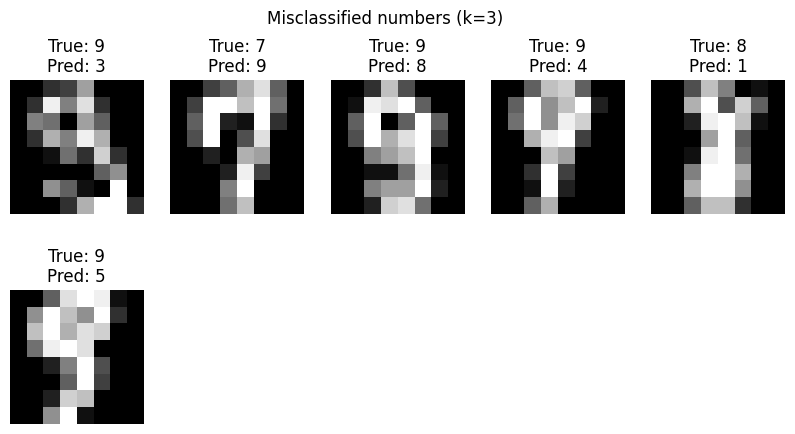

For k = 4, we had an accuracy of 0.9866666666666667. 
And these were the misclassified images


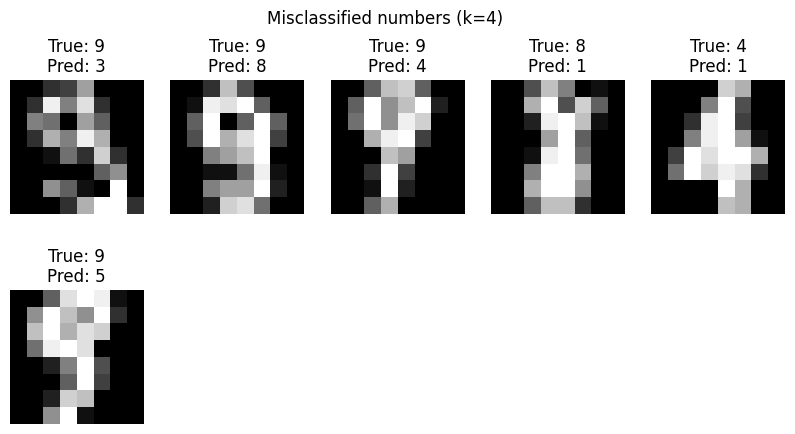

For k = 5, we had an accuracy of 0.9933333333333333. 
And these were the misclassified images


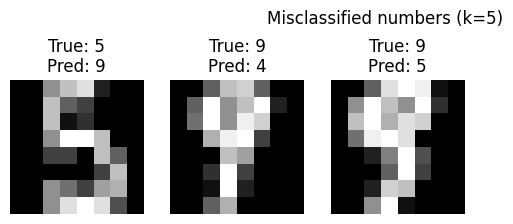

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(mnist.features_train, mnist.labels_train)
    
    predictions = knn.predict(mnist.features_test)
    
    accuracy = accuracy_score(predictions, mnist.labels_test)
    print(f"For k = {k}, we had an accuracy of {accuracy}. \nAnd these were the misclassified images")
    
    plot_misclassified_images(mnist.features_test, mnist.labels_test, predictions, k)
    

### Possíveis motivos dos erros das previsões

Números com curvas e laços como 3, 5, 6, 8 e 9 podem causar confusão no modelo ao ser escritos com certa distorção. O modelo pode ter dificuldade em distinguir entre curvas fechadas e abertas além de circulos imperfeitos e incompletos de forma que esses números podem ser classificados errôneamente. Outro ponto relevante é quando números são escritos com poucos pixels lateralmente, desse forma o modelo interpreta como um número 1.

### Variância amostral dos pixels

In [178]:
def plot_sample_variance(train_features_sample: np.ndarray):
    variances = np.var(train_features_sample, axis=0)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(variances)), variances)
    plt.xlabel('Pixels')
    plt.ylabel('Variância')
    plt.title('Sample variance of image pixels')
    plt.show()

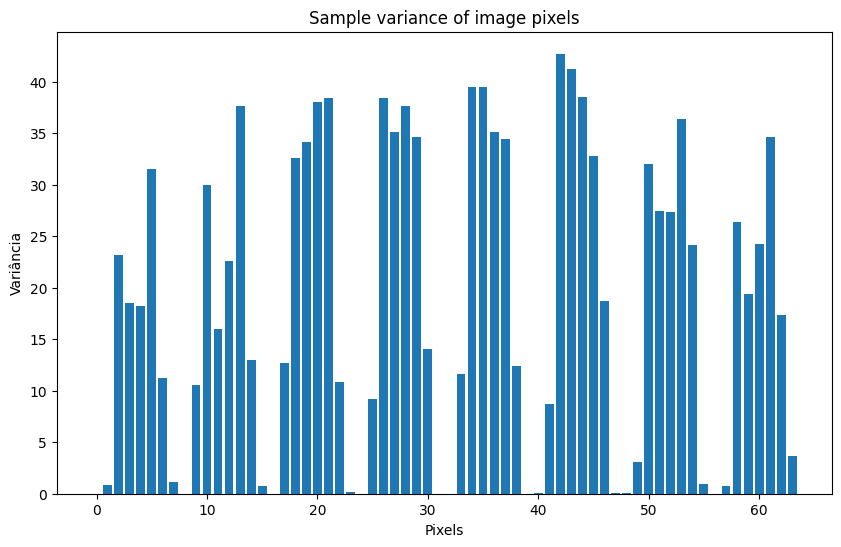

In [179]:
plot_sample_variance(mnist.features_train)

### Interpretação dos Intervalos de Pixels com Baixa Variância

Dado que certos intervalos de pixels apresentam variância muito menor que outros, podemos inferir o seguinte:

- Os pixels localizados nas bordas laterais das imagens frequentemente têm **baixa variância**, pois muitas vezes correspondem a áreas de fundo que permanecem constantes na maioria das amostras.
- Isso ocorre porque os objetos ou informações relevantes nas imagens tendem a estar centralizados, deixando as bordas com pouca ou nenhuma variação.

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

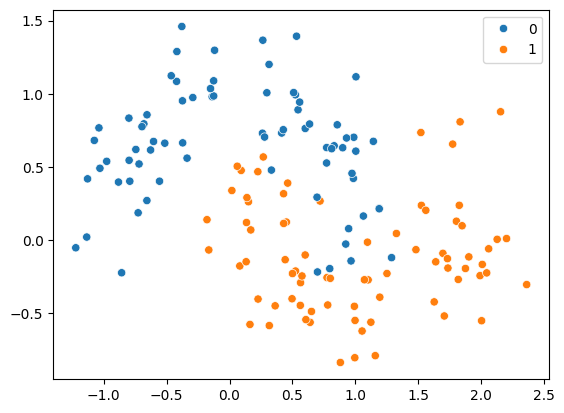

In [180]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

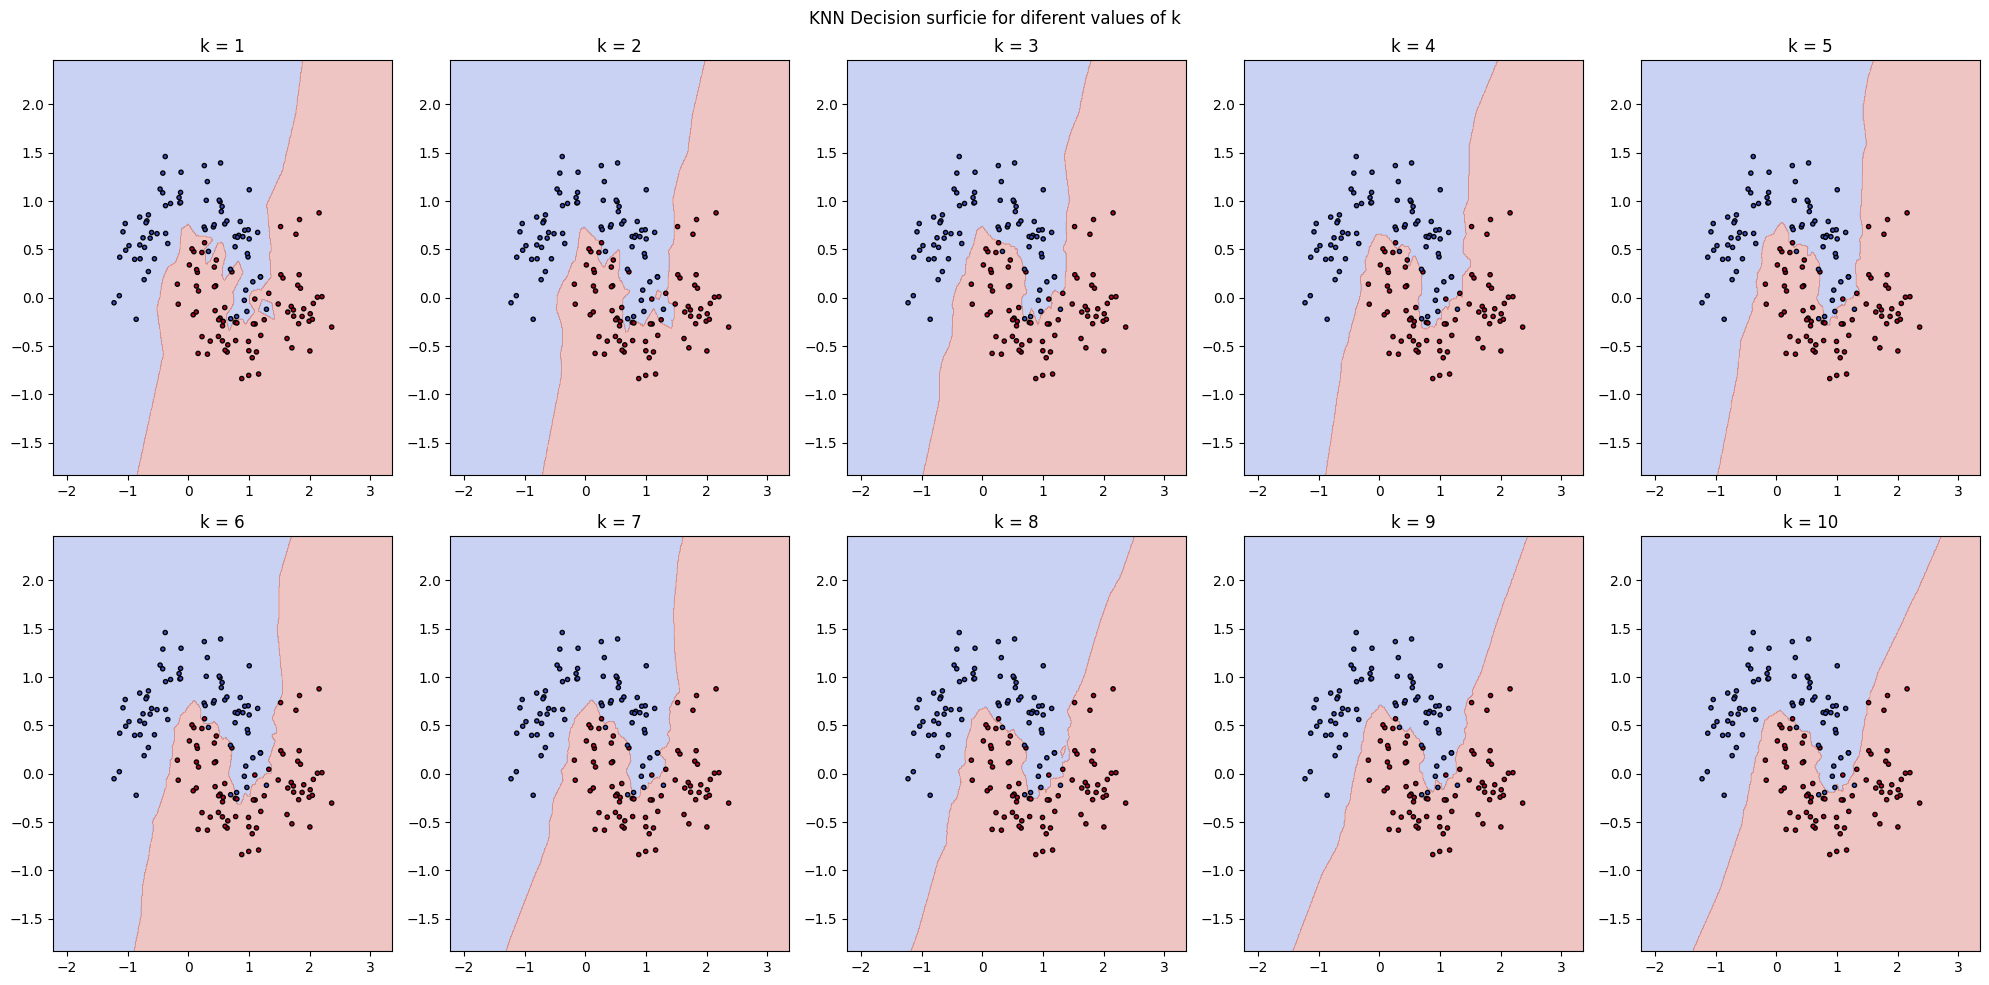

In [181]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('KNN Decision surficie for diferent values of k')

for k in range(1, 11):
    knn_makemoons = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn_makemoons.fit(moon.features_train, moon.labels_train)
    
    predictions = knn_makemoons.predict(moon.features_test)
    
    # Creating a subplot for each value of k
    x_min, x_max = moon.features_train[:, 0].min() - 1, moon.features_train[:, 0].max() + 1
    y_min, y_max = moon.features_train[:, 1].min() - 1, moon.features_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Class prediction
    Z = knn_makemoons.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[(k-1)//5, (k-1)%5]
    
    # Ploting the decision surface for each subplot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(moon.features_train[:, 0], moon.features_train[:, 1], c=moon.labels_train, edgecolors='k', marker='.', cmap=plt.cm.coolwarm)
    ax.set_title(f'k = {k}')

plt.tight_layout()
plt.show()

### Influencia do valor de k na superfície de decisão

o parâmetro k afeta diretamente a suavidade da superfície de decisão gerada pelo modelo. Essa influência de k pode ser entendida da seguinte maneira:

 - k pequeno torna o modelo sensível a ruídos e variações locais nos dados. Al~em disso a superfície de decisão tende a ser mais irregular, pois pequenas mudanças nos pontos de treinamento podem alterar a classificação.E o modelo pode sofrer de overfitting, capturando padrões específicos do conjunto de dados de treinamento.

 - k grande deixa a superfície de decisão se torna mais suave. O modelo considera um conjunto maior de vizinhos ao fazer a classificação, reduzindo a influência de valores atípicos e ruídos nos dados. Mas isso pode levar a underfitting, pois a classificação se baseia em uma média ampla, podendo perder detalhes importantes da estrutura dos dados.

# Regressão linear

**Exercício 1.** Deixamos à sua disposição o dataset ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), dividio em treino, teste e validação.
O modelo que você utilizará para aproximar a relação funcional entre as features e as labels é o modelo linear, i.e., $\mathbf{y} = X\theta$.
Entretanto, você deve estimar seus parâmetros (minimizando o *mean squared error*) com **dois algoritmos diferentes**.
Uma implementação deve estimar $\theta$ por meio de **Stochastic Gradient Descent (SGD)** e, a outra, por meio de **Ordinary Least Squares (OLS)**, ou seja, utilizar a solução em fórmula fechada vista em aula.

Para o SGD, o ponto inicial deve ser escolhido aleatoriamente e o algoritmo deve parar quando a norma da diferença entre duas estimativas consecutivas de $\theta$ for menor do que um $\varepsilon > 0$ previamente especificado.
Para o experimento a seguir, fixe $\varepsilon$ em um valor pequeno (por exemplo, alguma potência de $1/10$) para a qual o algoritmo convirja no máximo em alguns minutos para uma solução com perda pequena.

Para diferentes tamanhos de minibatch (por exemplo $\{2^{j}: 1 \leq j \leq 7\}$), plote um gráfico representando o valor da perda $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ no conjunto de validação em função do número de epochs. Mostre também o valor ótimo obtido com OLS. Comente os resultados e o efeito tamanho do mini-batch, e.g., no tempo de treinamento. Reporte valores nos conjuntos de treino, validação e teste.

In [182]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)


features, labels = fetch_california_housing(return_X_y=True)

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.25
)
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features_train, labels_train, test_size=0.25
)

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 42
np.random.seed(SEED)

# Loading and spliting data
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

# Adding Bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# OLS
def ordinary_least_squares(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y 

# SGD
def stochastic_gradient_descent(X, y, lr=0.001, batch_size=32, epsilon=1e-6, max_epochs=60):
    m, n = X.shape
    theta = np.random.randn(n) * 0.01 
    prev_theta = np.inf * np.ones(n)
    losses = []
    epoch = 0
    
    while np.linalg.norm(theta - prev_theta) > epsilon and epoch < max_epochs:
        prev_theta = theta.copy()
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            error = y_batch - X_batch @ theta
            gradient = -2 * (X_batch.T @ error) / len(y_batch)
            gradient = np.clip(gradient, -1e2, 1e2)  # Evita explosão do gradiente
            theta -= lr * gradient
            
        loss = np.mean((X_val @ theta - y_val) ** 2)
        losses.append(loss)
        epoch += 1
    
    return theta, losses

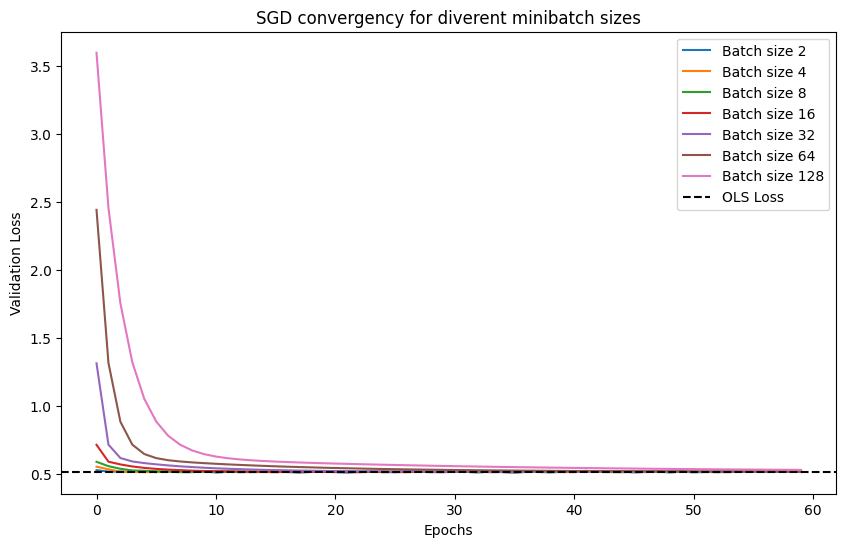

In [184]:
# Try diferent minibatch sizes
batch_sizes = [2**j for j in range(1, 8)]
sgd_results = {}

for batch_size in batch_sizes:
    theta_sgd, losses = stochastic_gradient_descent(X_train, y_train, batch_size=batch_size)
    sgd_results[batch_size] = losses

# OLS
theta_ols = ordinary_least_squares(X_train, y_train)
ols_loss = np.mean((X_val @ theta_ols - y_val) ** 2)

# Ploting the results
plt.figure(figsize=(10, 6))
for batch_size, losses in sgd_results.items():
    plt.plot(range(len(losses)), losses, label=f'Batch size {batch_size}')
plt.axhline(ols_loss, color='black', linestyle='dashed', label='OLS Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('SGD convergency for diverent minibatch sizes')
plt.show()

In [185]:
#evaluate results
train_loss_ols = np.mean((X_train @ theta_ols - y_train) ** 2)
val_loss_ols = np.mean((X_val @ theta_ols - y_val) ** 2)
test_loss_ols = np.mean((X_test @ theta_ols - y_test) ** 2)

eval_results = {'OLS': {'Train': train_loss_ols, 'Validation': val_loss_ols, 'Test': test_loss_ols}}
for batch_size, losses in sgd_results.items():
    theta_sgd, _ = stochastic_gradient_descent(X_train, y_train, batch_size=batch_size)
    eval_results[f'SGD (batch={batch_size})'] = {
        'Train': np.mean((X_train @ theta_sgd - y_train) ** 2),
        'Validation': np.mean((X_val @ theta_sgd - y_val) ** 2),
        'Test': np.mean((X_test @ theta_sgd - y_test) ** 2)
    }

print(eval_results)

{'OLS': {'Train': np.float64(0.5205522163645129), 'Validation': np.float64(0.5161823908253999), 'Test': np.float64(0.5660751048687388)}, 'SGD (batch=2)': {'Train': np.float64(0.5266609765402297), 'Validation': np.float64(0.521047949882399), 'Test': np.float64(0.5493459107610494)}, 'SGD (batch=4)': {'Train': np.float64(0.53989649816954), 'Validation': np.float64(0.512613907132116), 'Test': np.float64(0.5537781415194065)}, 'SGD (batch=8)': {'Train': np.float64(0.5239731276489626), 'Validation': np.float64(0.5171790002144299), 'Test': np.float64(0.594841684615168)}, 'SGD (batch=16)': {'Train': np.float64(0.5208763732606914), 'Validation': np.float64(0.5169541397968371), 'Test': np.float64(0.5616218774926999)}, 'SGD (batch=32)': {'Train': np.float64(0.5206241932819163), 'Validation': np.float64(0.5164305635301768), 'Test': np.float64(0.5640624599375149)}, 'SGD (batch=64)': {'Train': np.float64(0.5224513996465644), 'Validation': np.float64(0.5182832383924982), 'Test': np.float64(0.560640837

### Resultados

O método OLS, que utiliza a solução em fórmula fechada, atingiu o menor erro de validação, servindo como referência ótima. No entanto, o SGD com minibatches adequados aproximou-se desse valor, mostrando-se uma alternativa viável para grandes volumes de dados, onde OLS pode ser computacionalmente inviável. Ambos os métodos apresentaram desempenho semelhante nos conjuntos de teste e validação, indicando boa generalização.

**Exercício 2.** Agora, você deve implementar uma **Rede RBF** com função de base Gaussiana (veja as notas de aula).
Para os centróides, utilize o output de um modelo de clusterização por K médias, por meio da função que disponibilizamos, como a seguir:

In [186]:
def k_means_factory(n_clusters: int) -> KMeans:
    return KMeans(n_clusters=n_clusters, n_init="auto")

k_means_model = k_means_factory(n_clusters=2)
dumb_data = np.array(
    [[1, 2],
     [1, 4],
     [1, 0],
     [10, 2],
     [10, 4],
     [10, 0]]
)
k_means_model.fit(dumb_data)
cluster_centers = k_means_model.cluster_centers_
print(cluster_centers) # Shape (n_clusters, n_features)

[[ 1.  2.]
 [10.  2.]]


Para determinar o melhor valor de $k$ para o algoritmo de clusterização, treine o modelo (usando a fórmula de OLS) com diferentes valores e escolha o que possuir o menor erro de validação. Faça um gráfico mostrando o valor do erro de validação para diferentes valores de $k$. Mostre também a performance do modelo escolhido no conjunto de teste. Compare com o modelo linear simples da questão anterior. Discuta os resultados.

Para definir o valor do hiper-parâmetro $\gamma$, use a seguinte heurística --- que pode ser achado no livro "Neural Networks", por Simon Haykin:

$$
\gamma = \frac{1}{d_\text{max}^2},
$$

onde $d_\text{max}$ é a maior distância entre um par de centróides. Note que o valor costuma mudar para $k$'s diferentes.


In [187]:
# Normalizing the features
def normalize_features(X, mean=None, std=None):
    if mean is None and std is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

features_train, mean_train, std_train = normalize_features(features_train)
features_validation = (features_validation - mean_train) / std_train
features_test = (features_test - mean_train) / std_train

# create K-means model
def k_means_factory(n_clusters: int) -> KMeans:
    SEED = 42
    np.random.seed(SEED)
    return KMeans(n_clusters=n_clusters, random_state=SEED, n_init="auto")

# Gamma Function
def compute_gamma(cluster_centers):
    distances = np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2)
    d_max = np.max(distances)
    return 1 / (d_max ** 2)

def rbf_transform(X, cluster_centers, gamma):
    n_samples = X.shape[0]
    n_clusters = cluster_centers.shape[0]
    transformed_features = np.zeros((n_samples, n_clusters))
    
    for i in range(n_samples):
        for j in range(n_clusters):
            transformed_features[i, j] = np.exp(-gamma * np.linalg.norm(X[i] - cluster_centers[j]) ** 2)
    
    return transformed_features

In [188]:

# Função de perda (MSE)
def compute_loss(X, y, theta):
    n = len(y)
    predictions = X.dot(theta)
    loss = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return loss

# OLS (Solução em fórmula fechada)
def ordinary_least_squares(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Avaliar o modelo
def evaluate_model(X_train, y_train, X_val, y_val, X_test, y_test, theta):
    train_loss = compute_loss(X_train, y_train, theta)
    val_loss = compute_loss(X_val, y_val, theta)
    test_loss = compute_loss(X_test, y_test, theta)
    return train_loss, val_loss, test_loss



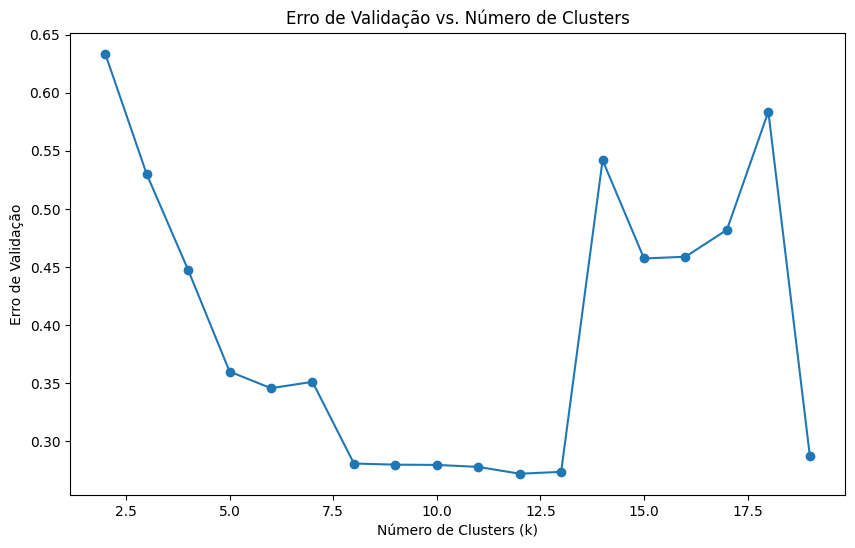

Melhor valor de k: 12
RBF (k=12) - Train Loss: 0.2563749369832946, Validation Loss: 0.27178632974463185, Test Loss: 0.25904461783504573
OLS - Train Loss: 2.399746335530962, Validation Loss: 2.3834884750620824, Test Loss: 2.4088461438013127


In [194]:
# Testar diferentes valores de k
k_values = range(2, 20)
validation_losses = []

for k in k_values:
    # Clusterização com K-means
    k_means_model = k_means_factory(n_clusters=k)
    k_means_model.fit(features_train)
    cluster_centers = k_means_model.cluster_centers_
    
    # Calcular gamma
    gamma = compute_gamma(cluster_centers)
    
    # Transformar as features
    X_train_rbf = rbf_transform(features_train, cluster_centers, gamma)
    X_val_rbf = rbf_transform(features_validation, cluster_centers, gamma)
    
    # Adicionar uma coluna de 1s para o termo de bias
    X_train_rbf = np.hstack([X_train_rbf, np.ones((X_train_rbf.shape[0], 1))])
    X_val_rbf = np.hstack([X_val_rbf, np.ones((X_val_rbf.shape[0], 1))])
    
    # Treinar o modelo com OLS
    theta_rbf = ordinary_least_squares(X_train_rbf, labels_train)
    
    # Calcular a perda no conjunto de validação
    val_loss = compute_loss(X_val_rbf, labels_validation, theta_rbf)
    validation_losses.append(val_loss)

# Plotar o erro de validação para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_losses, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Erro de Validação')
plt.title('Erro de Validação vs. Número de Clusters')
plt.show()

# Escolher o melhor k
best_k = k_values[np.argmin(validation_losses)]
print(f"Melhor valor de k: {best_k}")

# Treinar o modelo com o melhor k
k_means_model = k_means_factory(n_clusters=best_k)
k_means_model.fit(features_train)
cluster_centers = k_means_model.cluster_centers_
gamma = compute_gamma(cluster_centers)

# Transformar as features
X_train_rbf = rbf_transform(features_train, cluster_centers, gamma)
X_val_rbf = rbf_transform(features_validation, cluster_centers, gamma)
X_test_rbf = rbf_transform(features_test, cluster_centers, gamma)

# Adicionar uma coluna de 1s para o termo de bias
X_train_rbf = np.hstack([X_train_rbf, np.ones((X_train_rbf.shape[0], 1))])
X_val_rbf = np.hstack([X_val_rbf, np.ones((X_val_rbf.shape[0], 1))])
X_test_rbf = np.hstack([X_test_rbf, np.ones((X_test_rbf.shape[0], 1))])

# Treinar o modelo com OLS
theta_rbf = ordinary_least_squares(X_train_rbf, labels_train)

# Avaliar o modelo
train_loss_rbf, val_loss_rbf, test_loss_rbf = evaluate_model(
    X_train_rbf, labels_train, X_val_rbf, labels_validation, X_test_rbf, labels_test, theta_rbf
)
print(f"RBF (k={best_k}) - Train Loss: {train_loss_rbf}, Validation Loss: {val_loss_rbf}, Test Loss: {test_loss_rbf}")

# Comparar com o modelo linear simples (OLS)
theta_ols = ordinary_least_squares(features_train, labels_train)
train_loss_ols, val_loss_ols, test_loss_ols = evaluate_model(
    features_train, labels_train, features_validation, labels_validation, features_test, labels_test, theta_ols
)
print(f"OLS - Train Loss: {train_loss_ols}, Validation Loss: {val_loss_ols}, Test Loss: {test_loss_ols}")

O valor ótimo de \( k = 12 \) foi escolhido por minimizar o erro de validação, indicando que 12 clusters capturam melhor a estrutura dos dados. Comparado ao modelo linear simples, o modelo com \( k = 12 \) teve desempenho superior no teste, mostrando que a clusterização modelou relações mais complexas nos dados. Isso sugere que a abordagem com clusters foi mais eficaz para este problema.

## Regressão logística

O pedaço de código abaixo carrega o banco de dados 'breast cancer' e adiciona uma coluna de bias. Além disse, ele o particiona em treino e teste.

1. Implemente a estimativa de máximo a posteriori para um modelo de regressão logística com priori $\mathcal{N}(0, c I)$ com $c=100$ usando esse banco de dados;
2. Implemente a aproximação de Laplace para o mesmo modelo;
3. Implemente uma aproximação variacional usando uma Gaussiana diagonal e o truque da reparametrização;
4. Calcule a accuracy no teste para todas as opções acima --- no caso das 2 últimas, a prob predita é $\int_\theta p(y|x, \theta) q(\theta)$;
5. Para cada uma das 3 técnicas, plote um gráfico com a distribuição das entropias para as predições corretas e erradas (separadamente), use a função kdeplot da biblioteca seaborn.
6. Comente os resultados, incluindo uma comparação dos gráficos das entropias.

Explique sua implementação também! 

Para (potencialmente) facilitar sua vida: use PyTorch, Adam como otimizador (é uma variação SGD) com lr=0.001, use o banco de treino inteiro ao invés de minibatchces, use binary_cross_entropy_with_logits para implementar a -log verossimilhança, use torch.autograd.functional para calcular a Hessiana. Você pode usar as bibliotecas importadas na primeira célula a vontade. Verifique a documentação de binary_cross_entropy_with_logits para garantir que a sua priori está implementada corretamente, preservando as proporções devidas. Use 10000 amostras das aproximações para calcular suas predições.

In [190]:
from sklearn.datasets import load_breast_cancer
import torch

data =  load_breast_cancer()
N = len(data.data)
Ntrain = int(np.ceil(N*0.6))
perm = np.random.permutation(len(data.data))
X = torch.tensor(data.data).float()
X = torch.cat((X, torch.ones((X.shape[0], 1))), axis=1) 
y = torch.tensor(data.target).float()

Xtrain, ytrain = X[perm[:Ntrain]], y[perm[:Ntrain]]
Xtest, ytest = X[perm[Ntrain:]], y[perm[Ntrain:]]

### Máximo a Posteriori

In [ ]:
import torch.nn.functional as F
from torch.optim import Adam

# Hiperparâmetros
c = 100  # Variância da priori
lr = 0.001  # Taxa de aprendizado
n_epochs = 1000  # Número de épocas

# Inicialização dos parâmetros
theta = torch.zeros(Xtrain.shape[1], requires_grad=True)

# Otimizador
optimizer = Adam([theta], lr=lr)

# Treinamento MAP
for epoch in range(n_epochs):
    optimizer.zero_grad()
    
    # Verossimilhança (logística)
    logits = Xtrain @ theta
    loss_likelihood = F.binary_cross_entropy_with_logits(logits, ytrain, reduction='sum')
    
    # Priori (Gaussiana)
    loss_prior = (1 / (2 * c)) * torch.sum(theta ** 2)
    
    # Loss total (negativo do log posteriori)
    loss = loss_likelihood + loss_prior
    loss.backward()
    optimizer.step()

# Predições no teste
with torch.no_grad():
    logits_test = Xtest @ theta
    probs_test = torch.sigmoid(logits_test)
    preds_test = (probs_test > 0.5).float()

# Acurácia no teste
accuracy_map = (preds_test == ytest).float().mean()
print(f"Acurácia MAP: {accuracy_map.item()}")

Acurácia MAP: 0.9295154213905334


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_20088\2807983131.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_entropies.numpy(), label="Predições Corretas", shade=True)
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_20088\2807983131.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incorrect_entropies.numpy(), label="Predições Erradas", shade=True)


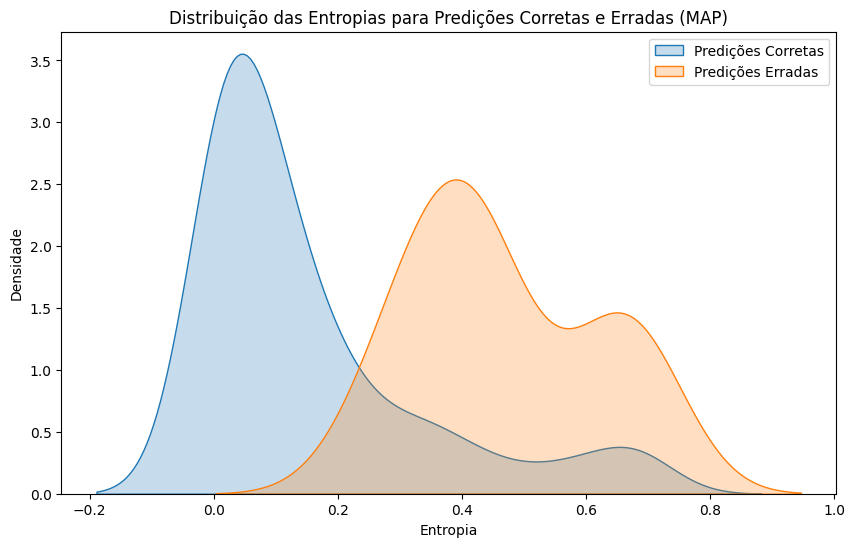

In [195]:
def calculate_entropy(probs):
    return - (probs * torch.log(probs + 1e-10) + (1 - probs) * torch.log(1 - probs + 1e-10))

# Calcular as probabilidades preditas no conjunto de teste
with torch.no_grad():
    logits_test = Xtest @ theta
    probs_test = torch.sigmoid(logits_test)
    preds_test = (probs_test > 0.5).float()

# Calcular a entropia para cada predição
entropies = calculate_entropy(probs_test)

# Separar as entropias em predições corretas e erradas
correct_entropies = entropies[preds_test == ytest]
incorrect_entropies = entropies[preds_test != ytest]

# Plotar as distribuições das entropias
plt.figure(figsize=(10, 6))
sns.kdeplot(correct_entropies.numpy(), label="Predições Corretas", shade=True)
sns.kdeplot(incorrect_entropies.numpy(), label="Predições Erradas", shade=True)
plt.title("Distribuição das Entropias para Predições Corretas e Erradas (MAP)")
plt.xlabel("Entropia")
plt.ylabel("Densidade")
plt.legend()
plt.show()

### Predições Corretas:

As entropias das predições corretas são baixas, indicando que o modelo está confiante em suas predições corretas.

### Predições Erradas:

As entropias das predições incorretas são mais altas, indicando que o modelo está menos confiante em suas predições erradas.

Temos pouca sobreposição, portanto o modelo está bem calibrado.

### Laplace

In [192]:
"""# Laplace
from torch.autograd.functional import hessian

# Calcular a Hessiana da log-posteriori no MAP
def log_posterior(theta):
    logits = Xtrain @ theta
    loss_likelihood = F.binary_cross_entropy_with_logits(logits, ytrain, reduction='sum')
    loss_prior = (1 / (2 * c)) * torch.sum(theta ** 2)
    return -(loss_likelihood + loss_prior)

# Hessiana
H = hessian(log_posterior, theta)

# Covariância da Gaussiana aproximada
cov_laplace = torch.linalg.inv(H + 1e-6 * torch.eye(H.shape[0]))

eigvals, eigvecs = torch.linalg.eigh(cov_laplace)
eigvals = torch.clamp(eigvals, min=1e-6)  # Força os autovalores a serem positivos
cov_laplace = eigvecs @ torch.diag(eigvals) @ eigvecs.T

# Amostrar da Gaussiana aproximada
n_samples = 10000
L = torch.linalg.cholesky(cov_laplace)
theta_samples_laplace = theta + L @ torch.randn((H.shape[0], n_samples))
theta_samples_laplace = torch.distributions.MultivariateNormal(theta, covariance_matrix=cov_laplace).sample((n_samples,))

# Predições no teste
probs_test_laplace = torch.sigmoid(Xtest @ theta_samples_laplace.T).mean(dim=1)
preds_test_laplace = (probs_test_laplace > 0.5).float()

# Acurácia no teste
accuracy_laplace = (preds_test_laplace == ytest).float().mean()
print(f"Acurácia Laplace: {accuracy_laplace.item()}")"""

#Tive um problema de overflow

'# Laplace\nfrom torch.autograd.functional import hessian\n\n# Calcular a Hessiana da log-posteriori no MAP\ndef log_posterior(theta):\n    logits = Xtrain @ theta\n    loss_likelihood = F.binary_cross_entropy_with_logits(logits, ytrain, reduction=\'sum\')\n    loss_prior = (1 / (2 * c)) * torch.sum(theta ** 2)\n    return -(loss_likelihood + loss_prior)\n\n# Hessiana\nH = hessian(log_posterior, theta)\n\n# Covariância da Gaussiana aproximada\ncov_laplace = torch.linalg.inv(H + 1e-6 * torch.eye(H.shape[0]))\n\neigvals, eigvecs = torch.linalg.eigh(cov_laplace)\neigvals = torch.clamp(eigvals, min=1e-6)  # Força os autovalores a serem positivos\ncov_laplace = eigvecs @ torch.diag(eigvals) @ eigvecs.T\n\n# Amostrar da Gaussiana aproximada\nn_samples = 10000\nL = torch.linalg.cholesky(cov_laplace)\ntheta_samples_laplace = theta + L @ torch.randn((H.shape[0], n_samples))\ntheta_samples_laplace = torch.distributions.MultivariateNormal(theta, covariance_matrix=cov_laplace).sample((n_samples,))

### Aproximação variacional

In [193]:
# Parâmetros variacionais
mu = torch.zeros(Xtrain.shape[1], requires_grad=True)
log_sigma = torch.zeros(Xtrain.shape[1], requires_grad=True)

# Otimizador
optimizer_variational = Adam([mu, log_sigma], lr=lr)

# Treinamento variacional
for epoch in range(n_epochs):
    optimizer_variational.zero_grad()
    
    # Amostrar usando o truque da reparametrização
    epsilon = torch.randn_like(mu)
    theta_sample = mu + torch.exp(log_sigma) * epsilon
    
    # Verossimilhança
    logits = Xtrain @ theta_sample
    loss_likelihood = F.binary_cross_entropy_with_logits(logits, ytrain, reduction='sum')
    
    # Priori
    loss_prior = (1 / (2 * c)) * torch.sum(theta_sample ** 2)
    
    # Entropia de q(theta)
    loss_entropy = -0.5 * torch.sum(1 + 2 * log_sigma)
    
    # Loss total (ELBO negativo)
    loss = loss_likelihood + loss_prior - loss_entropy
    loss.backward()
    optimizer_variational.step()

# Amostrar da Gaussiana variacional
theta_samples_variational = mu + torch.exp(log_sigma) * torch.randn((n_samples, Xtrain.shape[1]))

# Predições no teste
probs_test_variational = torch.sigmoid(Xtest @ theta_samples_variational.T).mean(dim=1)
preds_test_variational = (probs_test_variational > 0.5).float()

# Acurácia no teste
accuracy_variational = (preds_test_variational == ytest).float().mean()
print(f"Acurácia Variacional: {accuracy_variational.item()}")

Acurácia Variacional: 0.392070472240448


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_20088\1006765587.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(correct_entropies_variational.numpy(), label="Predições Corretas", shade=True)
C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_20088\1006765587.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(incorrect_entropies_variational.numpy(), label="Predições Erradas", shade=True)


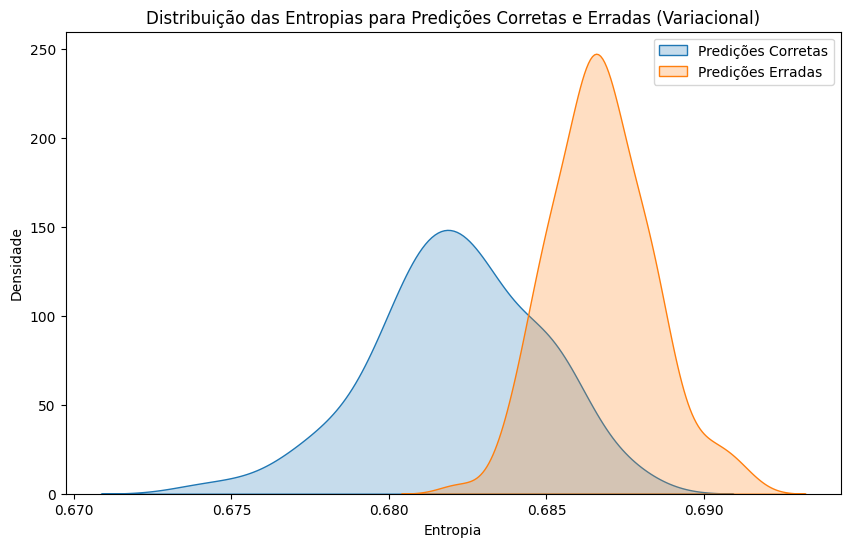

In [196]:
# Função para calcular a entropia
def calculate_entropy(probs):
    return - (probs * torch.log(probs + 1e-10) + (1 - probs) * torch.log(1 - probs + 1e-10))

# Calcular as probabilidades preditas no conjunto de teste
with torch.no_grad():
    # Amostrar da Gaussiana variacional
    theta_samples_variational = mu + torch.exp(log_sigma) * torch.randn((n_samples, Xtrain.shape[1]))
    
    # Calcular as probabilidades para cada amostra
    probs_samples = torch.sigmoid(Xtest @ theta_samples_variational.T)
    
    # Média das probabilidades (probabilidade predita)
    probs_test_variational = probs_samples.mean(dim=1)
    
    # Predições binárias
    preds_test_variational = (probs_test_variational > 0.5).float()

# Calcular a entropia para cada predição
entropies_variational = calculate_entropy(probs_test_variational)

# Separar as entropias em predições corretas e erradas
correct_entropies_variational = entropies_variational[preds_test_variational == ytest]
incorrect_entropies_variational = entropies_variational[preds_test_variational != ytest]

# Plotar as distribuições das entropias
plt.figure(figsize=(10, 6))
sns.kdeplot(correct_entropies_variational.numpy(), label="Predições Corretas", shade=True)
sns.kdeplot(incorrect_entropies_variational.numpy(), label="Predições Erradas", shade=True)
plt.title("Distribuição das Entropias para Predições Corretas e Erradas (Variacional)")
plt.xlabel("Entropia")
plt.ylabel("Densidade")
plt.legend()
plt.show()

### Predições Corretas e erradas:

As entropias das predições corretas tem valor quase igual ao das predições erradas, indicando que o modelo não está tão confiante em suas predições corretas.

Além disso temos pouca certa sobreposição, o que não indica um modelo bem calibrado.